In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def sigmoid_activation(x):
  return (1/(1+np.exp(-x)))

def derivative_sigmoid(y):
  return ((sigmoid_activation(y)*(1-sigmoid_activation(y))))

def error(target,calculated):
  return (calculated-target)


In [ ]:
num=sigmoid_activation(5)
print(num)

In [ ]:
W1=np.array([[0.15,0.20],[0.25,0.30]])
print(W1)
W2=np.array([[0.40,0.45],[0.50,0.55]])
print(W2[0][1])
b1=np.array([[0.35],[0.35]])
b2=np.array([[0.60],[0.60]])
X=np.array([[0.05],[0.10]])
H1_in=(np.dot(W1,X))+b1
print("input of H1")
print(H1_in)
H1_out=sigmoid_activation(H1_in)
print("Output of  H1")
print(H1_out)
H1_derivative=derivative_sigmoid(H1_in)
print("Derivative of H1:")
print(H1_derivative)

[[0.15 0.2 ]
 [0.25 0.3 ]]
0.45
input of H1
[[0.3775]
 [0.3925]]
Output of  H1
[[0.59326999]
 [0.59688438]]
Derivative of H1:
[[0.24130071]
 [0.24061342]]


In [ ]:
H2_in=(np.dot(W2,H1_out))+b2
print("input of H2")
print(H2_in)
H2_out=sigmoid_activation(H2_in)
print("Output of H2")
print(H2_out)
H2_derivative=derivative_sigmoid(H2_in)
print("Derivative of H2:")
print(H2_derivative)

input of H2
[[1.10590597]
 [1.2249214 ]]
Output of H2
[[0.75136507]
 [0.77292847]]
Derivative of H2:
[[0.1868156 ]
 [0.17551005]]


In [ ]:
Error01=(1/2)*((error(0.01,H2_out[0]))**2)
Error02=(1/2)*((error(0.99,H2_out[1]))**2)
TotalError=Error01+Error02
print(Error01,Error02)
print("The total error is :",TotalError)

[0.27481108] [0.02356003]
The total error is : [0.29837111]


In [ ]:
print(error(0.01,H2_out[0]))
changeinW10=error(0.01,H2_out[0][0])*H2_derivative[0][0]*H1_out[0][0]
print(changeinW10)

[0.74136507]
0.08216704056423078


In [ ]:
target=np.array([[0.01],[0.99]])
changeinW2=np.zeros((2,2))
print(error(0.01,H2_out[0][0]))
print(H2_derivative[0][0])
print(H1_out[0][0])
changeinW2[0][0]=error(0.01,H2_out[0][0])*H2_derivative[0][0]*H1_out[0][0]
print(changeinW2[0][0])
changeinW2[1][0]=error(0.99,H2_out[1][0])*H2_derivative[1][0]*H1_out[0][0]
print(changeinW2[1][0])
changeinW2[0][1]=error(0.01,H2_out[0][0])*H2_derivative[0][0]*H1_out[1][0]
print(changeinW2[0][1])
changeinW2[1][1]=error(0.99,H2_out[1][0])*H2_derivative[1][0]*H1_out[1][0]
print(changeinW2[1][1])
print(changeinW2)
print("**************************************************************")
for i in range(0,2):
  for j in range(0,2):
    h_out=H1_out[i][0]
    derivative = H2_derivative[j][0]
    errors=error(target[j][0],H2_out[j][0])
    changeinW2[i][j]=h_out*derivative*errors
changeinW2=changeinW2.transpose()
print(changeinW2)

0.7413650695523157
0.18681560180895948
0.5932699921071872
0.08216704056423078
-0.022602540477475067
0.08266762784753326
-0.02274024221597822
[[ 0.08216704  0.08266763]
 [-0.02260254 -0.02274024]]
**************************************************************
[[ 0.08216704  0.08266763]
 [-0.02260254 -0.02274024]]


In [ ]:
W2_new=np.zeros((2,2))
#W2_new[0][0]=W2[0][0]-(0.50*changeinW2[0][0])
#print(W2_new[0][0])

W2_new=W2-(0.5*changeinW2)
print(W2_new)

[[0.35891648 0.40866619]
 [0.51130127 0.56137012]]


In [ ]:
target=np.array([[0.01],[0.99]])
changeinW1=np.zeros((2,2))
for i in range(0,2):
  for j in range(0,2):
    input=X[i][0]
    if (j==0):
      sum=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
    else:
      sum=(W2[1][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[1][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
    changeinW1[i][j]=input*H1_derivative[j][0]*sum
    #changeinW1[i][j]=input*H1_derivative[j][0]*((W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])) + (W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])))
changeinW1=changeinW1.transpose()
print(changeinW1)


[[0.00046155 0.0009231 ]
 [0.00058102 0.00116205]]


In [ ]:
W1_new=np.zeros((2,2))
#W2_new[0][0]=W2[0][0]-(0.50*changeinW2[0][0])
#print(W2_new[0][0])

W1_new=W1-(0.5*changeinW1)
print(W1_new)

[[0.14976922 0.19953845]
 [0.24970949 0.29941898]]


In [ ]:
biasderivative2 = H2_derivative[0][0]
biaserrors2=error(target[0][0],H2_out[0][0])
changeinB2=np.zeros((2,1))
changeinB2[0][0]=biasderivative2*biaserrors2
changeinB2[1][0]=biasderivative2*biaserrors2
print(changeinB2)

b2=b2-(0.5*changeinB2)
print(b2) #new b2

[[0.13849856]
 [0.13849856]]
[[0.53075072]
 [0.53075072]]


In [ ]:
sum=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
changeinB1=np.zeros((2,1))
changeinB1[0][0]=H1_derivative[0][0]*sum
changeinB1[1][0]=H1_derivative[0][0]*sum
print(changeinB1)
b1=b1-(0.5*changeinB1)
print(b1) #new b1

[[0.00923101]
 [0.00923101]]
[[0.34538449]
 [0.34538449]]


[[0.14244661 0.18489322]
 [0.25       0.41666068]]
[[-3.08442968 -3.05331409]
 [ 0.5         3.09883616]]
[[0.04483061]
 [0.94015191]]
[0.001849]


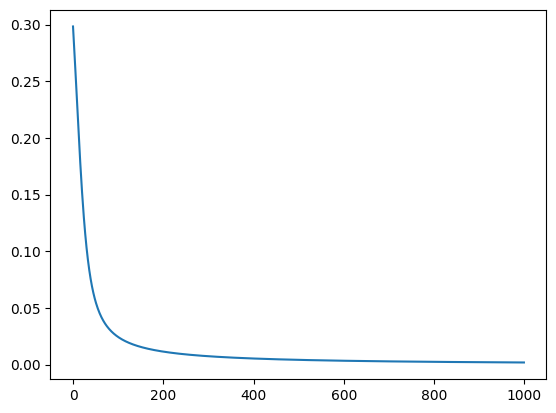

In [ ]:
W1=np.array([[0.15,0.20],[0.25,0.30]])

W2=np.array([[0.40,0.45],[0.50,0.55]])

b1=np.array([[0.35],[0.35]])
b2=np.array([[0.60],[0.60]])
X=np.array([[0.05],[0.10]])
target=np.array([[0.01],[0.99]])
changeinW2=np.zeros((2,2))
changeinW1=np.zeros((2,2))
W2_new=np.zeros((2,2))
W1_new=np.zeros((2,2))
error_list=[]
xpoints_list=[]
for k in range (0,1000): #20085
  H1_in=(np.dot(W1,X))+b1

  H1_out=sigmoid_activation(H1_in)

  H1_derivative=derivative_sigmoid(H1_in)

  H2_in=(np.dot(W2,H1_out))+b2

  H2_out=sigmoid_activation(H2_in)

  H2_derivative=derivative_sigmoid(H2_in)

  Error01=(1/2)*((error(0.01,H2_out[0]))**2)
  Error02=(1/2)*((error(0.99,H2_out[1]))**2)
  TotalError=Error01+Error02
  error_list.append(TotalError)
  xpoints_list.append(k)
  for i in range(0,2):
    for j in range(0,2):
      h_out=H1_out[i][0]
      derivative = H2_derivative[j][0]
      errors=error(target[j][0],H2_out[j][0])
      changeinW2[i][j]=h_out*derivative*errors
    changeinW2=changeinW2.transpose()


  W2=W2-(0.5*changeinW2) #learning rate=0.5

  for i in range(0,2):
    for j in range(0,2):
      input=X[i][0]
      if (j==0):
        sum=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      else:
        sum=(W2[1][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[1][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      changeinW1[i][j]=input*H1_derivative[j][0]*sum
    #changeinW1[i][j]=input*H1_derivative[j][0]*((W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])) + (W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])))
    changeinW1=changeinW1.transpose()


  W1=W1-(0.5*changeinW1)

  # biasderivative2 = H2_derivative[0][0]
  # biaserrors2=error(target[0][0],H2_out[0][0])
  # changeinB2=np.zeros((2,1))
  # changeinB2[0][0]=biasderivative2*biaserrors2
  # changeinB2[1][0]=biasderivative2*biaserrors2
  # #print(changeinB2)
  # b2=b2-(0.5*changeinB2)
  # #print(b2) #new b2

  # sumbias=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
  # changeinB1=np.zeros((2,1))
  # changeinB1[0][0]=H1_derivative[0][0]*sumbias
  # changeinB1[1][0]=H1_derivative[0][0]*sumbias
  #print(changeinB1)
  # b1=b1-(0.5*changeinB1)
  #print(b1) #new b1
# W1=W1_new
# W2=W2_new
print(W1)
print(W2)
print(H2_out)
print(error_list[-1])
xpoints = np.array(xpoints_list)
ypoints = np.array(error_list)

plt.plot(xpoints, ypoints)
plt.show()

[[0.13581889 0.17163779]
 [0.25       0.42243786]]
[[-1.15565816 -1.11285054]
 [ 0.5         4.50709538]]
[[0.02280289]
 [0.95788988]]
[0.00059749]


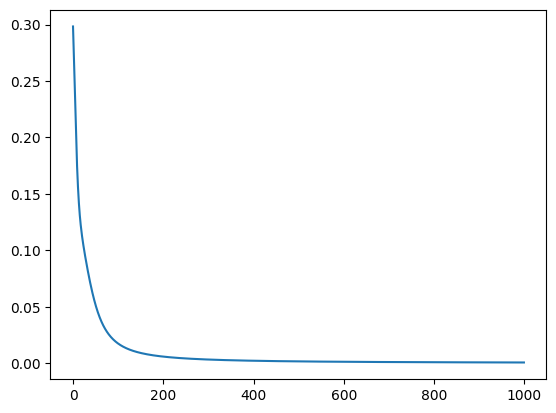

In [ ]:
W1=np.array([[0.15,0.20],[0.25,0.30]])

W2=np.array([[0.40,0.45],[0.50,0.55]])

b1=np.array([[0.35],[0.35]])
b2=np.array([[0.60],[0.60]])
X=np.array([[0.05],[0.10]])
target=np.array([[0.01],[0.99]])
changeinW2=np.zeros((2,2))
changeinW1=np.zeros((2,2))
W2_new=np.zeros((2,2))
W1_new=np.zeros((2,2))
error_list=[]
xpoints_list=[]
for k in range (0,1000): #20085
  H1_in=(np.dot(W1,X))+b1

  H1_out=sigmoid_activation(H1_in)

  H1_derivative=derivative_sigmoid(H1_in)

  H2_in=(np.dot(W2,H1_out))+b2

  H2_out=sigmoid_activation(H2_in)

  H2_derivative=derivative_sigmoid(H2_in)

  Error01=(1/2)*((error(0.01,H2_out[0]))**2)
  Error02=(1/2)*((error(0.99,H2_out[1]))**2)
  TotalError=Error01+Error02
  error_list.append(TotalError)
  xpoints_list.append(k)
  for i in range(0,2):
    for j in range(0,2):
      h_out=H1_out[i][0]
      derivative = H2_derivative[j][0]
      errors=error(target[j][0],H2_out[j][0])
      changeinW2[i][j]=h_out*derivative*errors
    changeinW2=changeinW2.transpose()


  W2=W2-(0.5*changeinW2) #learning rate=0.5

  for i in range(0,2):
    for j in range(0,2):
      input=X[i][0]
      if (j==0):
        sum=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      else:
        sum=(W2[1][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[1][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      changeinW1[i][j]=input*H1_derivative[j][0]*sum
    #changeinW1[i][j]=input*H1_derivative[j][0]*((W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])) + (W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])))
    changeinW1=changeinW1.transpose()


  W1=W1-(0.5*changeinW1)

  biasderivative2 = H2_derivative[0][0]
  biaserrors2=error(target[0][0],H2_out[0][0])
  changeinB2=np.zeros((2,1))
  changeinB2[0][0]=biasderivative2*biaserrors2
  changeinB2[1][0]=biasderivative2*biaserrors2
  #print(changeinB2)
  b2=b2-(0.5*changeinB2)
  #print(b2) #new b2


  changeinB1=np.zeros((2,1))
  changeinB1[0][0]=(error(target[1][0],H2_out[0][0])*H2_derivative[0][0]*W2[1][0]*H1_derivative[1][0])+(error(target[1][0],H2_out[1][0])*H2_derivative[1][0]*W2[1][1]*H1_derivative[0][0])
  changeinB1[1][0]=(error(target[1][0],H2_out[0][0])*H2_derivative[0][0]*W2[1][0]*H1_derivative[1][0])+(error(target[1][0],H2_out[1][0])*H2_derivative[1][0]*W2[1][1]*H1_derivative[0][0])
  #print(changeinB1)
  b1=b1-(0.5*changeinB1)
  #print(b1) #new b1
# W1=W1_new
# W2=W2_new
print(W1)
print(W2)
print(H2_out)
print(error_list[-1])
xpoints = np.array(xpoints_list)
ypoints = np.array(error_list)

plt.plot(xpoints, ypoints)
plt.show()